In [7]:
import torch

x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True)

#######
device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
x = x.to(device)
#######

function = 10 * (x ** 2).sum()

x.retain_grad()
function.backward()

print(x.grad, '<- gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]], device='cuda:0') <- gradient


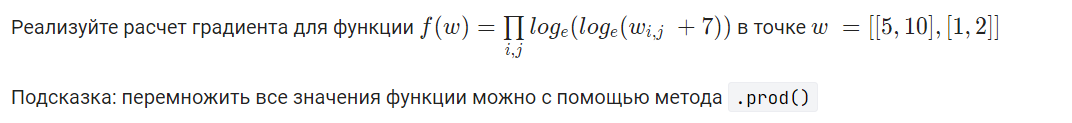

In [8]:
w = torch.tensor([[5.,  10.],
                 [1.,  2.]], requires_grad=True)

function = torch.log(torch.log((w + 7))).prod()
w.retain_grad()
function.backward()

print(w.grad)

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])


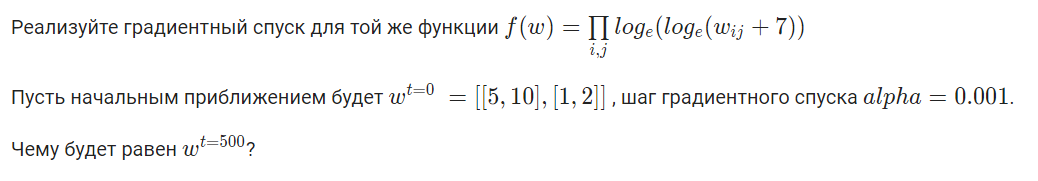

In [10]:
w = torch.tensor([[5., 10.],
                  [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -=  alpha * w.grad
    w.grad.zero_()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


In [5]:
x = torch.tensor(
    [8., 8.], requires_grad=True)

optimizer = torch.optim.SGD([x], lr=0.001)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    
for i in range(500):
    make_gradient_step(function_parabola, x)
x

tensor([0.0003, 0.0003], requires_grad=True)

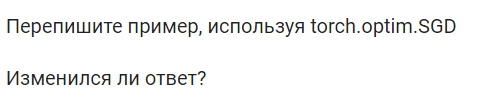

In [6]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001
optimizer =  torch.optim.SGD([w], lr=0.001)

for _ in range(500):
    function = (w + 7).log().log().prod()
    function.backward()
    optimizer.step()
    optimizer.zero_grad()

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)
